Practicing the OLS Regression methodology using python

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


### Import the dataset

In [2]:
df = pd.read_csv("C:\SharpestMinds\Datasets\HouseSalesInKingCountyUSA\kc_house_data.csv")

### Understand the data

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Single Factor Regression Analysis
### Price and Sq. feet Living Space
We choose sqft_living as the most known factor in price for a simpleregression analysis.

In [5]:
df[['price','sqft_living']].describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


In [6]:
ind = df['sqft_living']
dep = df['price']
model = sm.OLS(dep, ind)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.126e+05
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                        0.00
Time:                        14:30:56   Log-Likelihood:                     -3.0032e+05
No. Observations:               21613   AIC:                                  6.006e+05
Df Residuals:                   21612   BIC:                                  6.006e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.0892      0.784    335.597      0.000     261.553     264.626
==============================================================================
Omnibus:                    16043.334   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692411.859
Skew:                           3.130   Prob(JB):                         0.00
Kurtosis:                      30.013   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Verifying the Assumptions of Linear Regression
Before going further in understanding the outcome of our regression model, we would need to confirm that the model satisfies the Gausss-Markov assumptions for performing the analysis.

#### Checking the Linearity

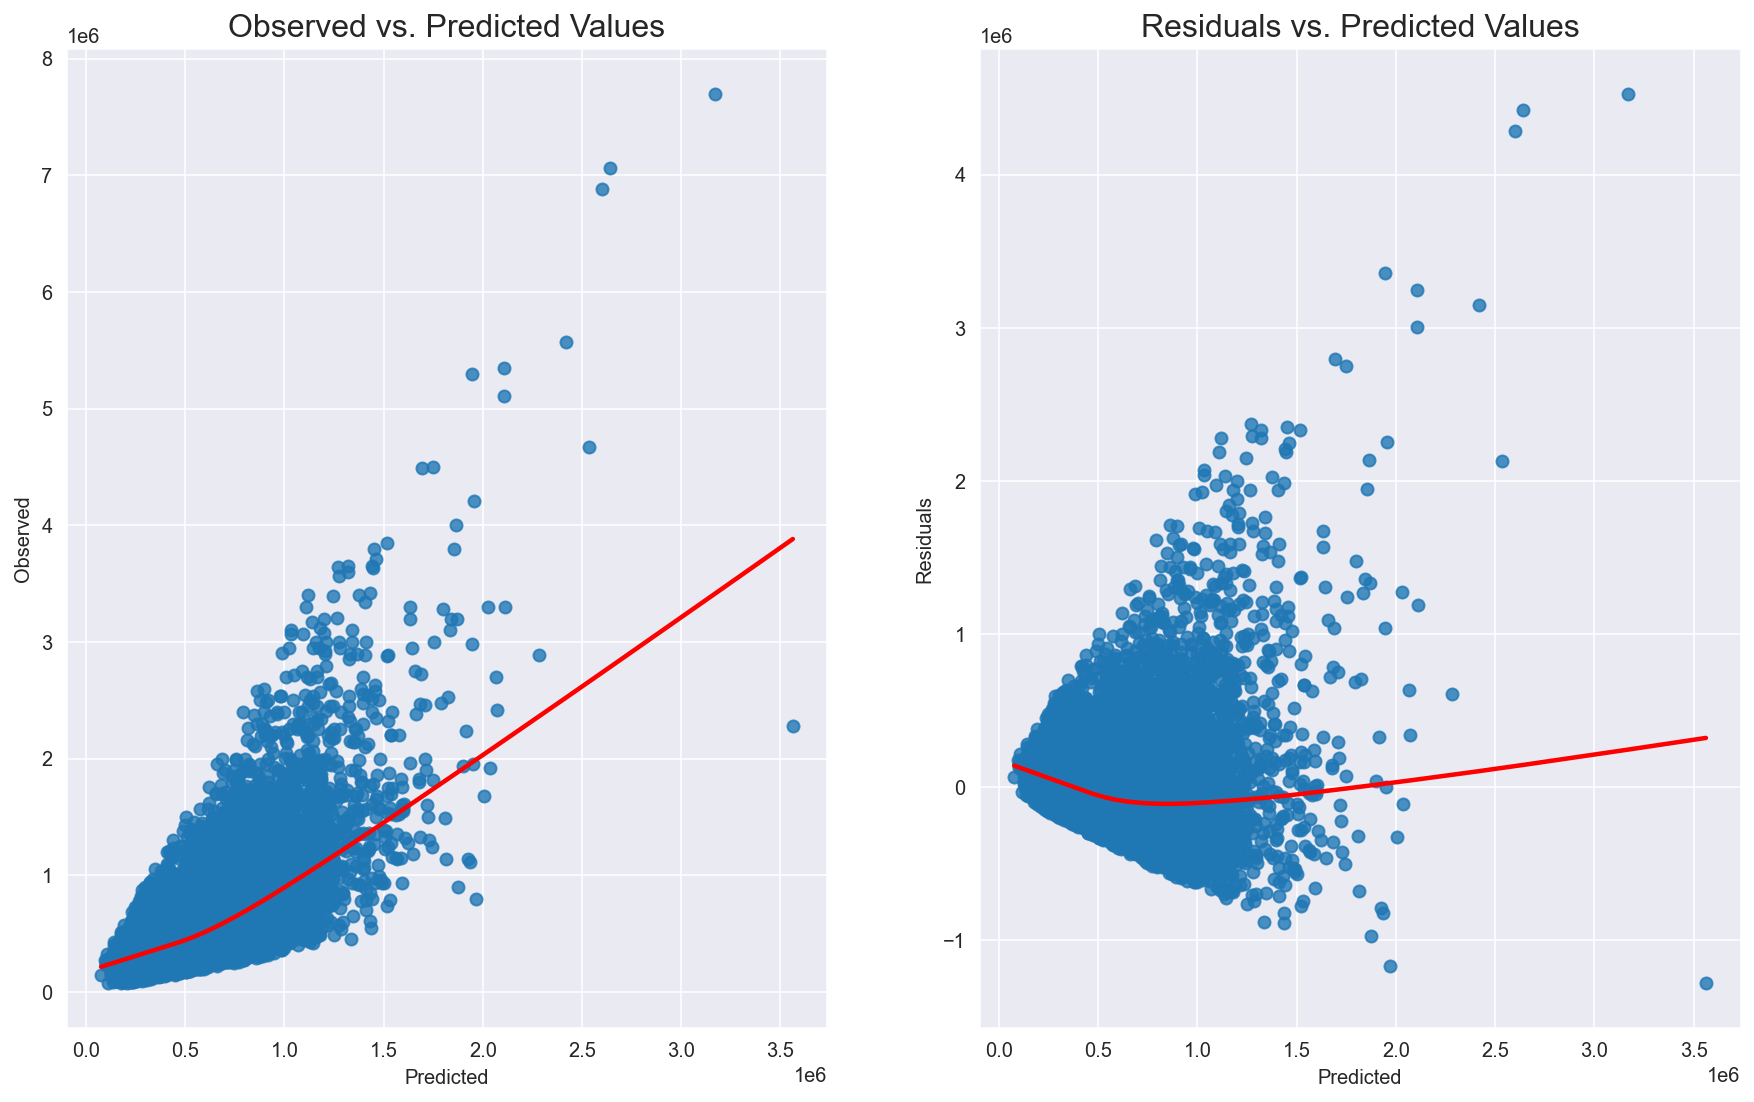

In [7]:
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(results, dep)    

#### Checking the Expectation

In [8]:
results.resid.mean()

-7110.993960648369

#### Homoscedasticity 


 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  1951.497871
p-value                                NaN
f-value                        2145.094089
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  0.922754
p-value      0.999985

 Residuals plots ----


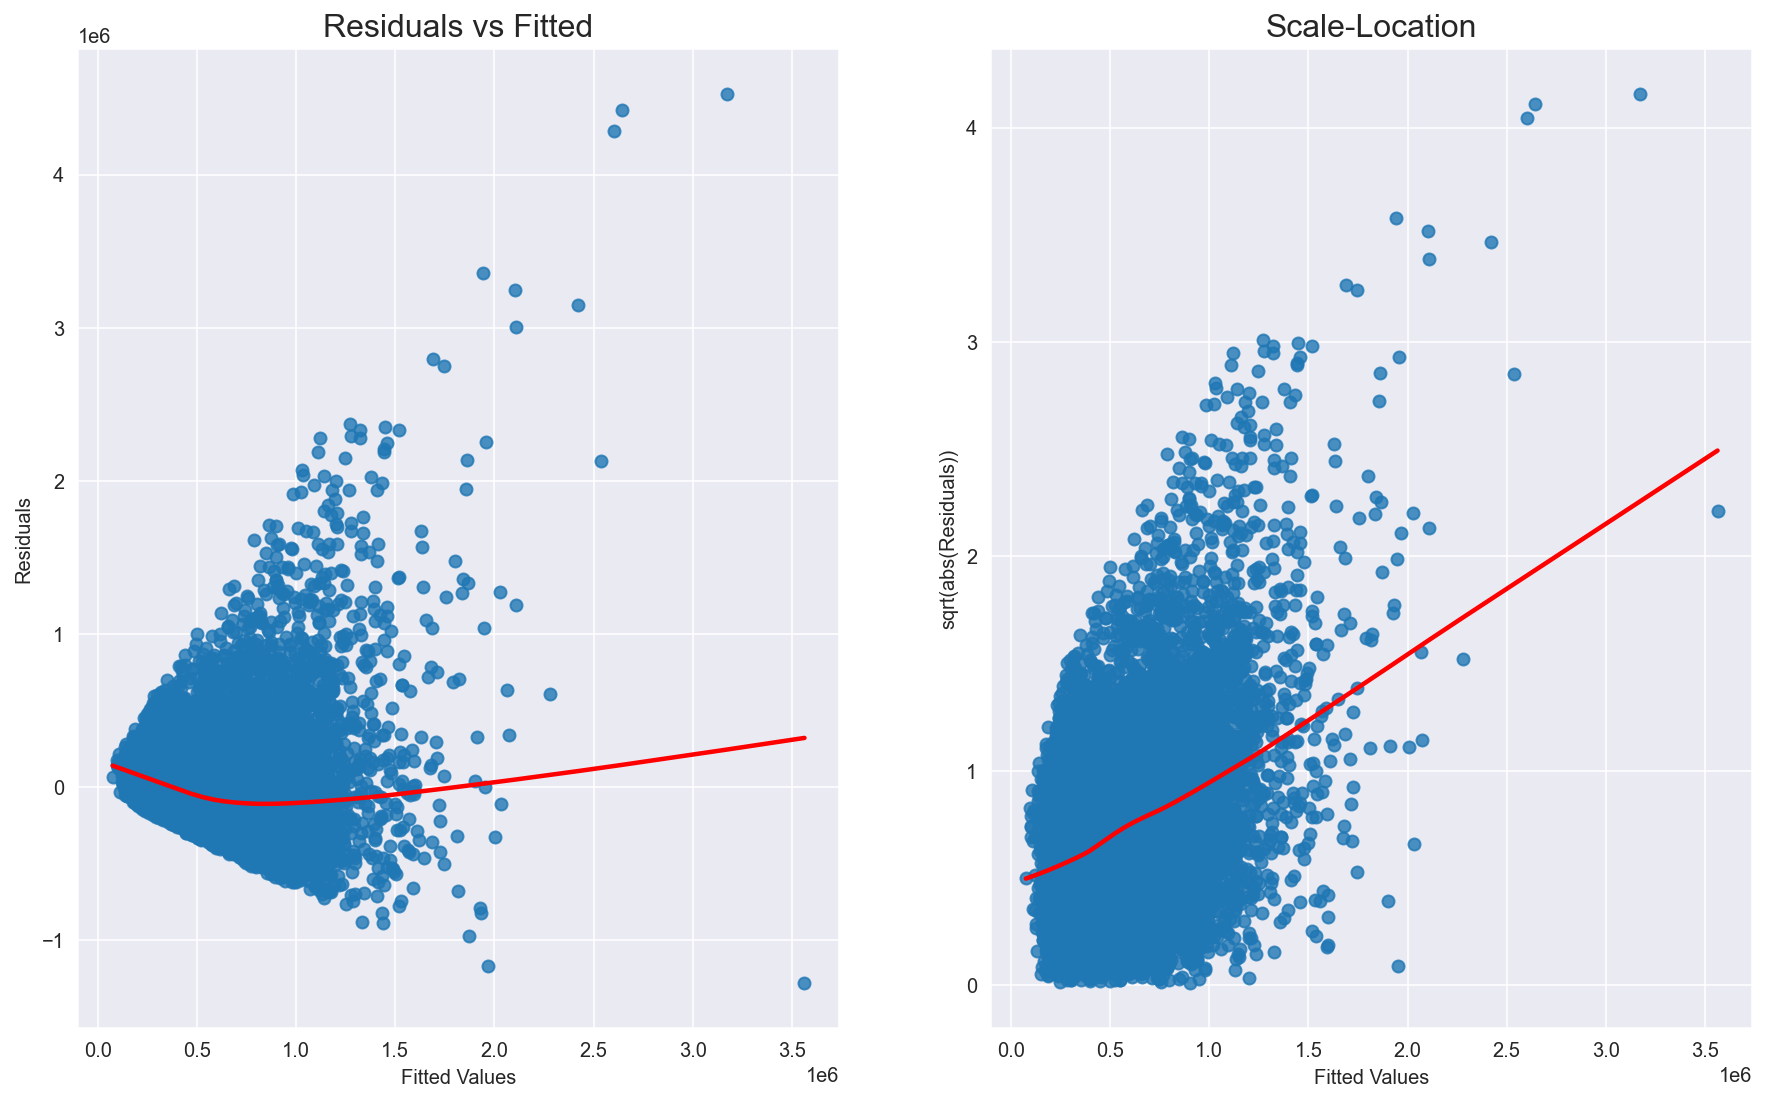

In [9]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(results)

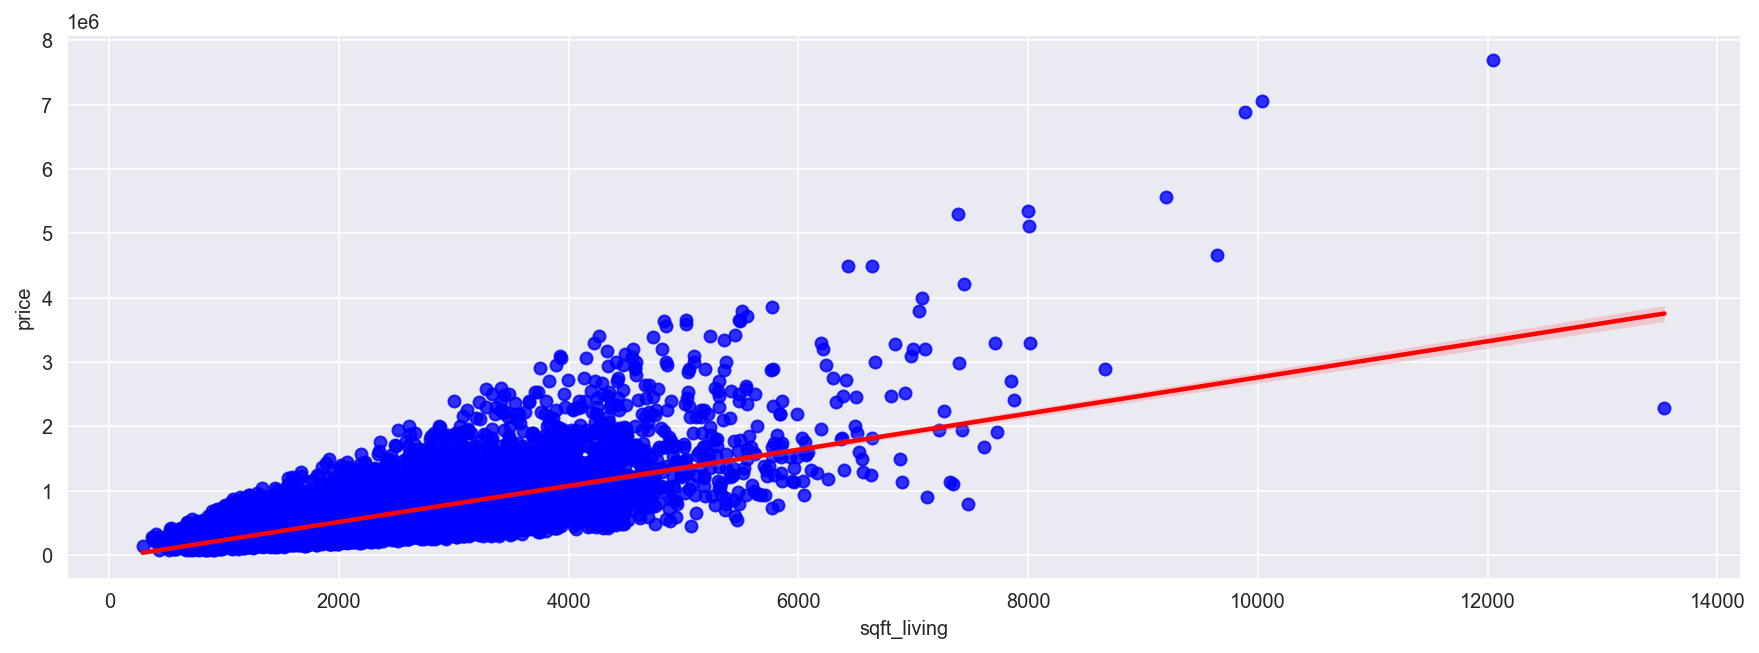

In [10]:
olsgraph = sns.regplot(x=ind, y=dep, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
olsgraph.figure.set_size_inches(15,5)

Visual inspection indicates linear correlation between bathrooms and sqft_living.

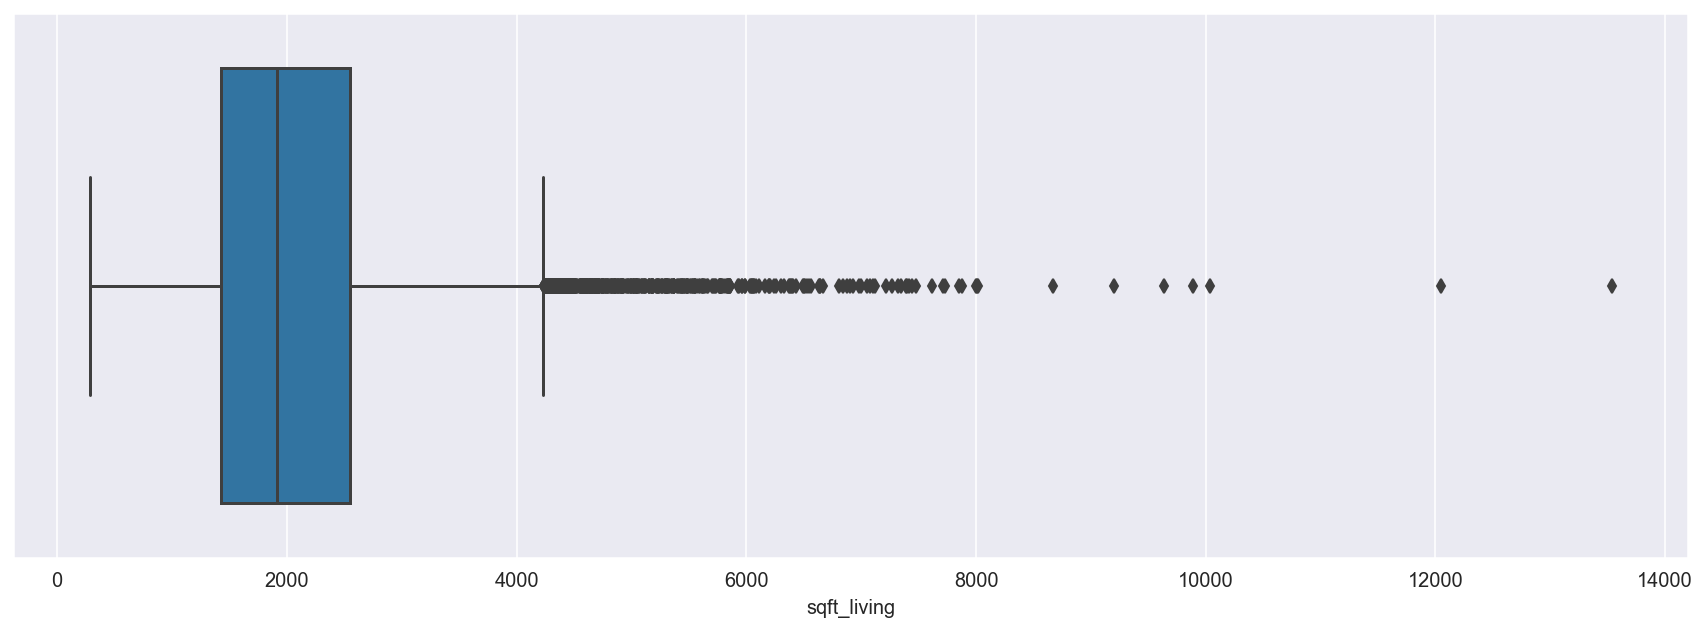

In [11]:
bpgraph=sns.boxplot(x='sqft_living', data=df)
bpgraph.figure.set_size_inches(15,5)

The graph above shows an asymetric distribution of the data and that it is positively skewed. This suggests the need to remove some of the outliers from the data. Below, we first continue our analysis with the data as is. Then we will define a rule for our outliers to be removed and repeat the analysis.

## Multiple Factor Resression Analysis

In [12]:
# Before we go further with the exploratory analysis, we exclude the factors that are not helpful
# to our analysis at this stage: yr_renovated, zipcode, lat, long

df_m = df[['price',
            'bedrooms',
            'bathrooms',
            'sqft_living',
            'sqft_lot',
            'floors',
            'waterfront',
            'view',
            'condition',
            'grade',
            'sqft_above',
            'sqft_basement',
            'yr_built',
            'sqft_living15',
            'sqft_lot15']]

df_m.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


### Pair Plot
In order to choose what factors we would want to include in the model, we first use pair plots to identify all the vaiables with any correlation with price.

Operation time (min):  1.4356770833333334


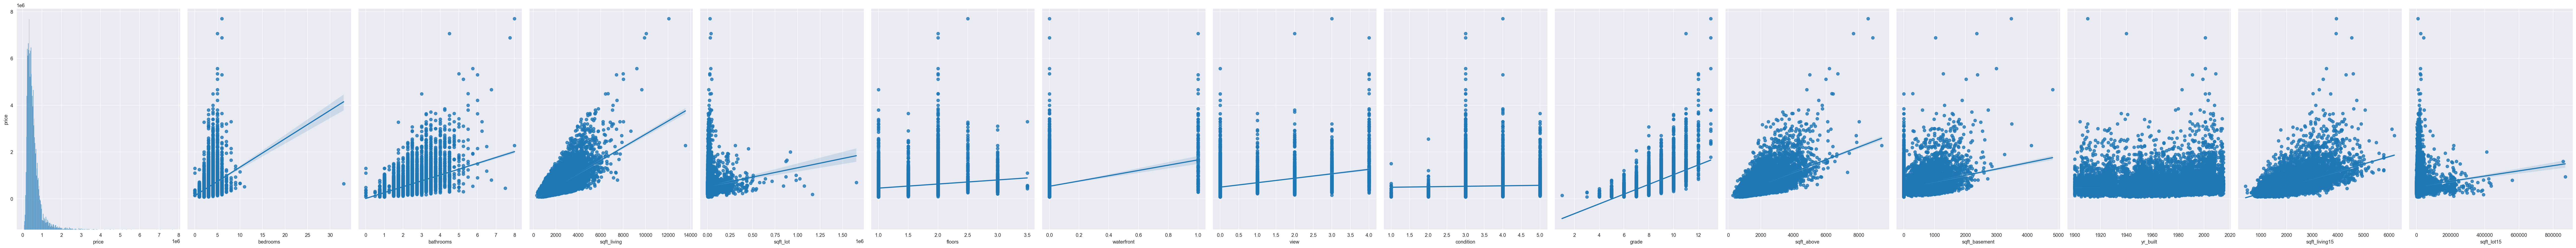

In [13]:


# Time tracking, Operation time (min):  0.003
t = time.process_time()  

ax_3pairs = sns.pairplot(df_m, y_vars='price', height=7, aspect=0.7, kind='reg')


print("Operation time (min): " , (time.process_time()-t)/60)


### VIF

In [14]:
# VIF dataframe
vif_data = pd.DataFrame()
df_vif = df_m.drop(['price'], axis=1)
vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]
  
print(vif_data)

          feature         VIF
0        bedrooms   23.055000
1       bathrooms   24.925732
2     sqft_living         inf
3        sqft_lot    2.365341
4          floors   16.430226
5      waterfront    1.208353
6            view    1.511914
7       condition   30.059385
8           grade  139.764528
9      sqft_above         inf
10  sqft_basement         inf
11       yr_built  126.689994
12  sqft_living15   26.325384
13     sqft_lot15    2.576158


As VIF test above indicates, there is strong collinearity between sqft_living, sqft_above and sqft_basement. We use the correlation heatmap to choose what variables to exclude.

<AxesSubplot:>

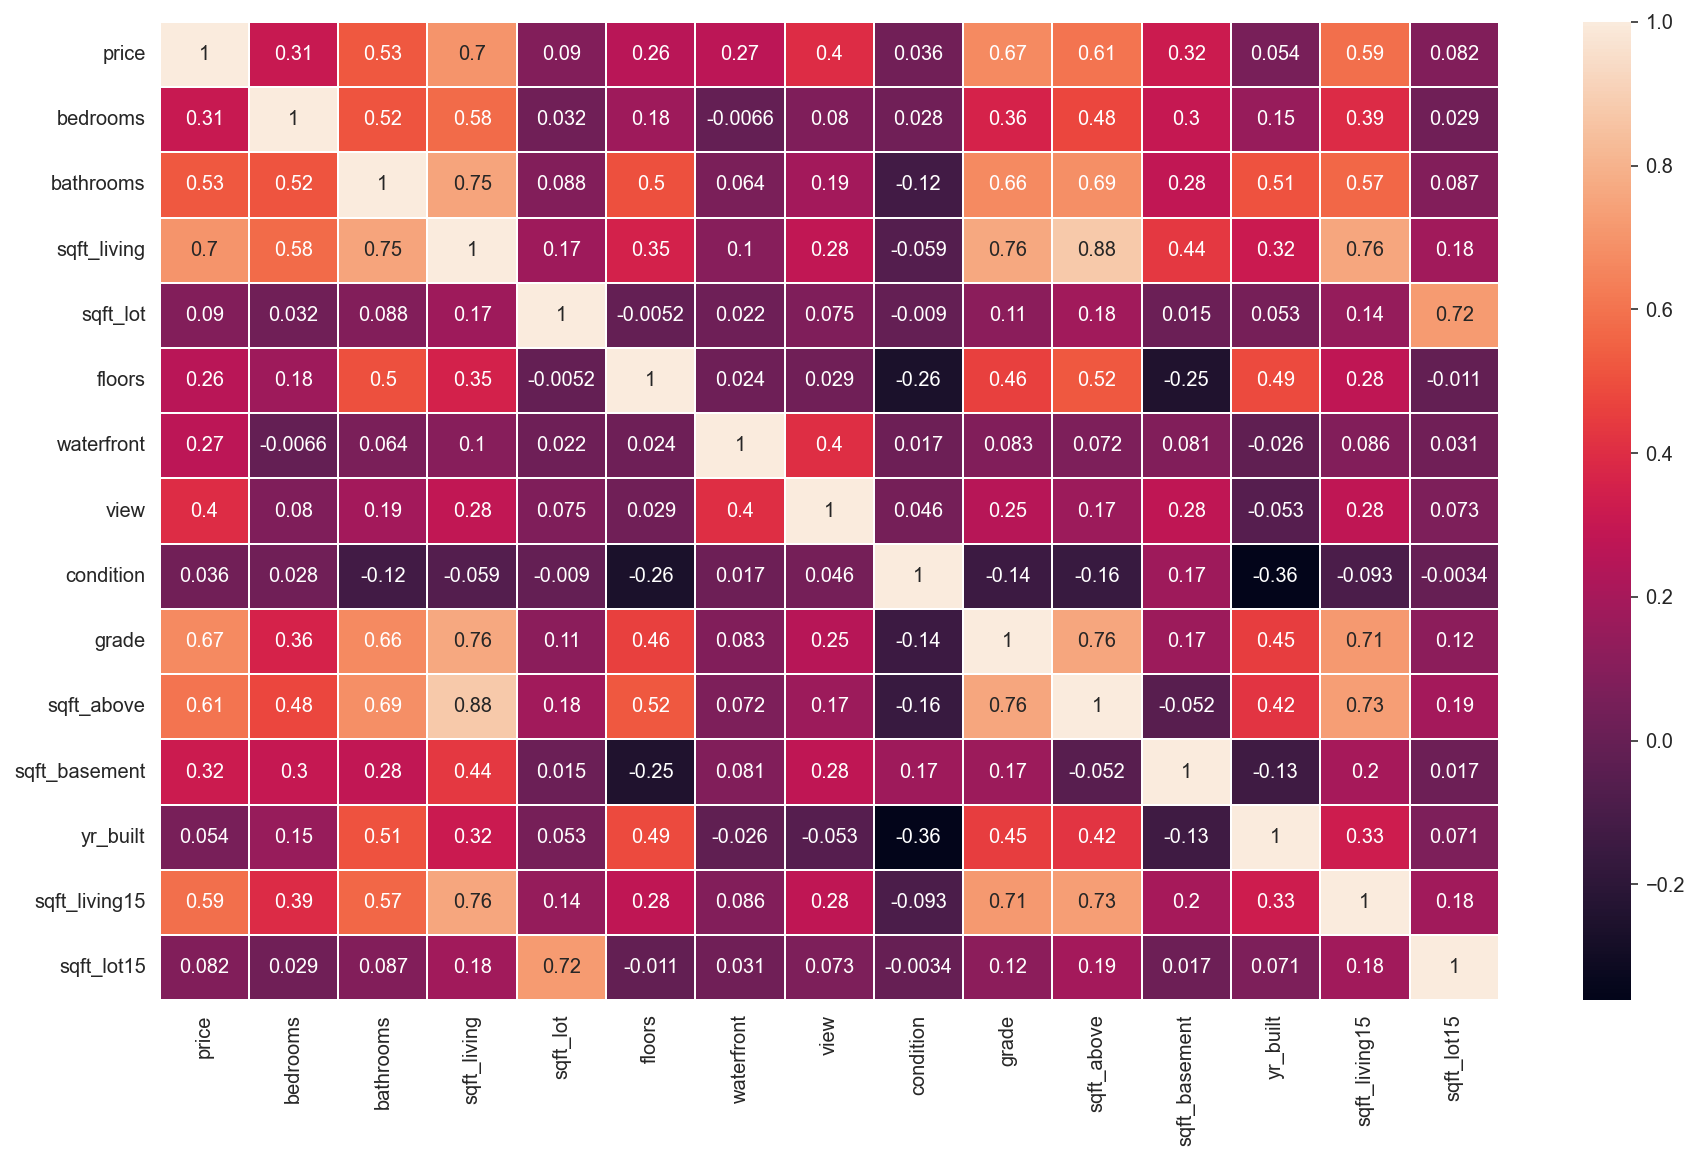

In [15]:
sns.heatmap(df_m.corr(),annot=True,lw=1)

On the heatmap, we look at the correlations higher than 0.7 and highest correlation between independent variables, and among the two, we choose the one that has more correlations higher than 0.7 with the other vauriables.
In the above heatmap sqft_living and sqft_above have the highest correlation of 0.88. sqft_living has 3 more high value correlation, while sqft_above has 2.
We exclude the 'sqft_living' and see how the VIF scores change.

In [16]:
# VIF dataframe
vif_data = pd.DataFrame()
df_vif = df_m.drop(['price','sqft_living'], axis=1)
vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]
  
print(vif_data)

          feature         VIF
0        bedrooms   23.055000
1       bathrooms   24.925732
2        sqft_lot    2.365341
3          floors   16.430226
4      waterfront    1.208353
5            view    1.511914
6       condition   30.059385
7           grade  139.764528
8      sqft_above   27.232635
9   sqft_basement    2.755767
10       yr_built  126.689994
11  sqft_living15   26.325384
12     sqft_lot15    2.576158


<AxesSubplot:>

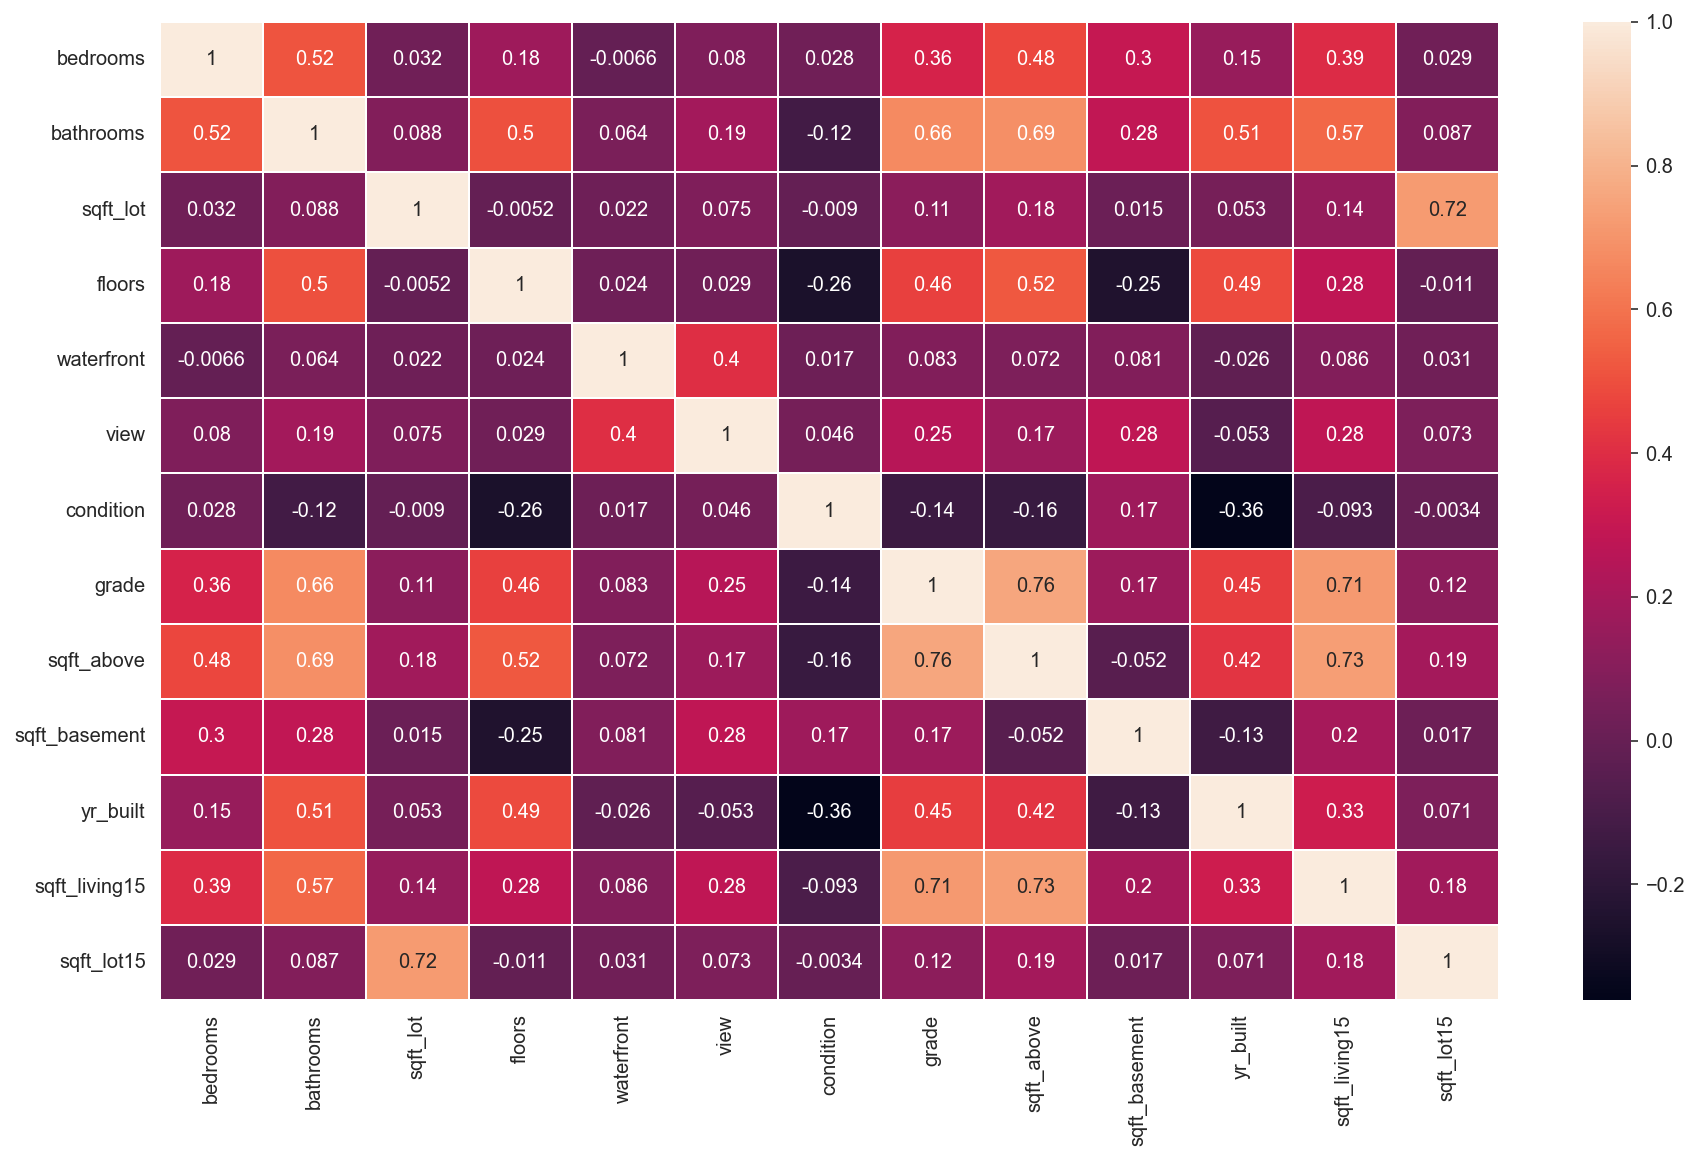

In [17]:
sns.heatmap(df_vif.corr(),annot=True,lw=1)

Repeating the same logic, we identify the sqft_above and grade having the highest correlation. While they both have one more high value correlation, we choose grade to exclude next since it also has the highest VIF score.

In [18]:
# VIF dataframe
vif_data = pd.DataFrame()
df_vif = df_m.drop(['price','sqft_living', 'grade'], axis=1)
vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]
  
print(vif_data)

          feature        VIF
0        bedrooms  22.543603
1       bathrooms  24.556963
2        sqft_lot   2.365337
3          floors  16.099258
4      waterfront   1.207673
5            view   1.502349
6       condition  30.048332
7      sqft_above  23.454295
8   sqft_basement   2.632237
9        yr_built  61.802231
10  sqft_living15  24.263391
11     sqft_lot15   2.571459


<AxesSubplot:>

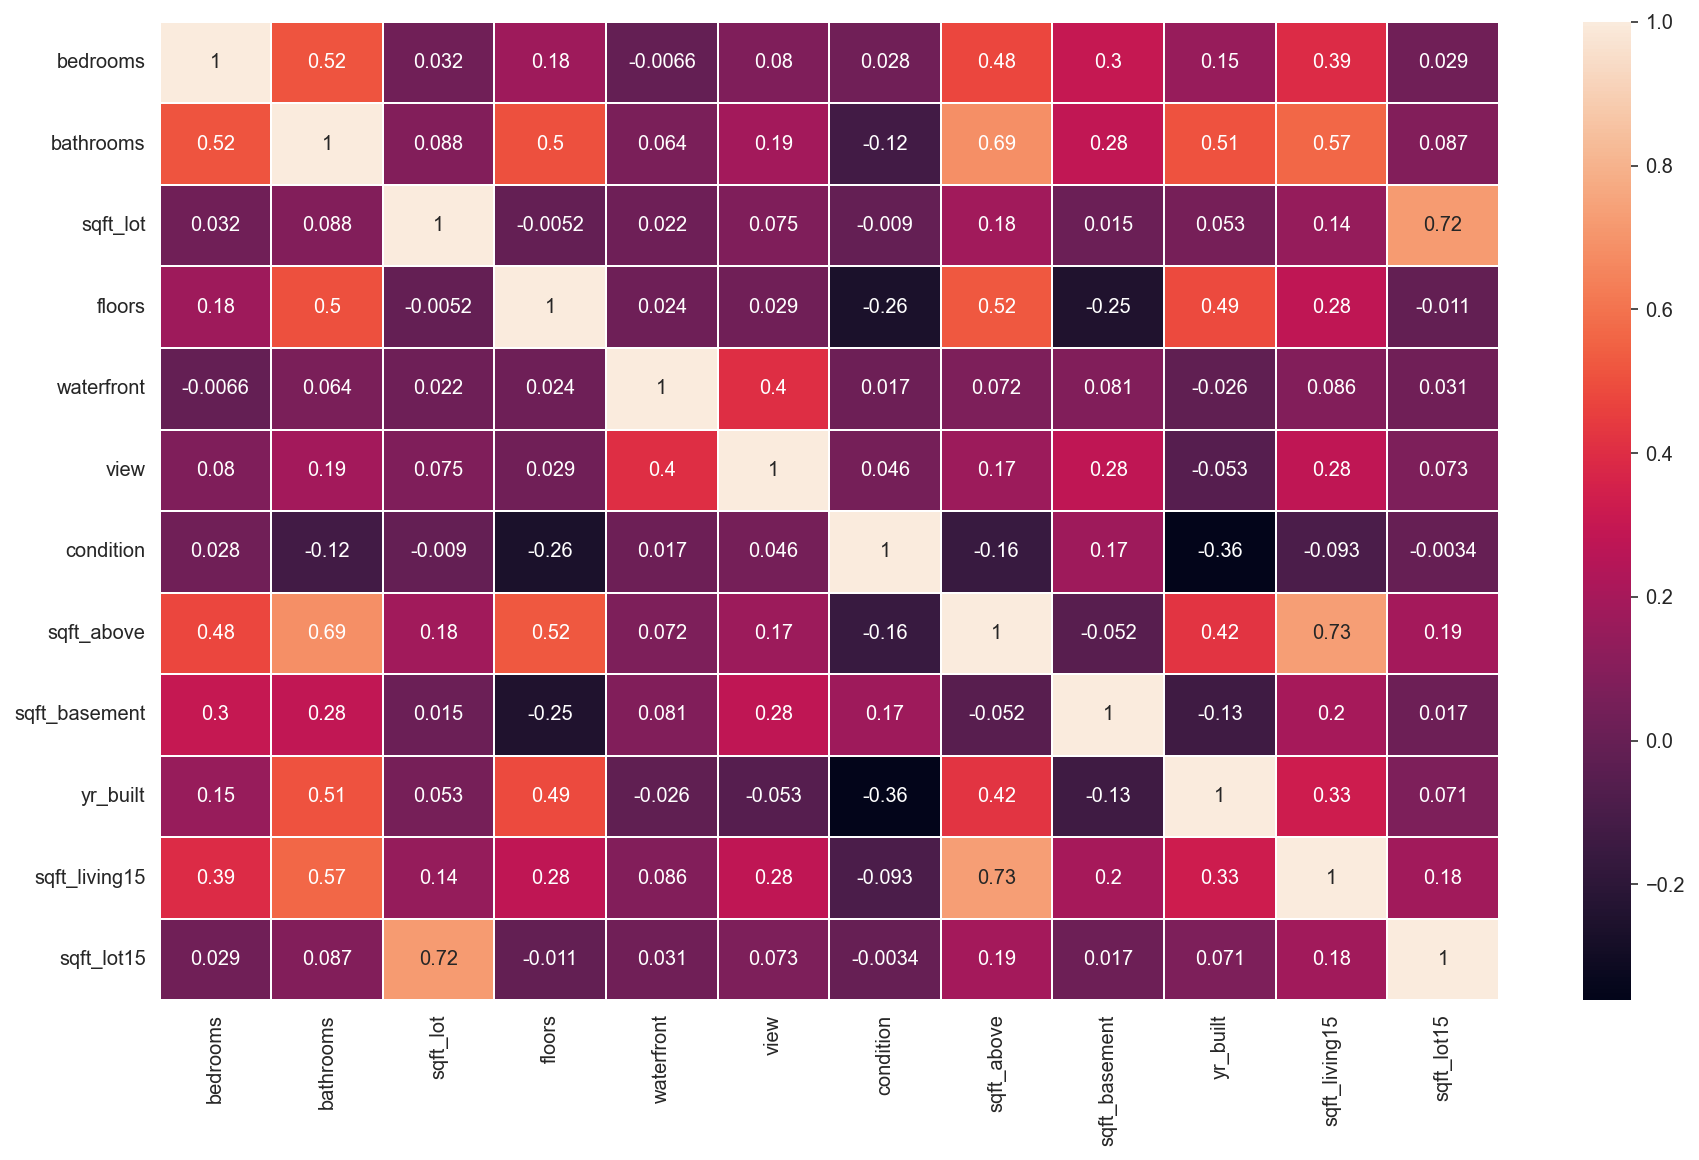

In [19]:
sns.heatmap(df_vif.corr(),annot=True,lw=1)

Next two variables with highest correlation on the map are sqft_above and sqft_living15, where sqft_living15 has the higher VIF score.

In [20]:
# VIF dataframe
vif_data = pd.DataFrame()
df_vif = df_m.drop(['price','sqft_living', 'grade', 'sqft_living15'], axis=1)
vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]
  
print(vif_data)

          feature        VIF
0        bedrooms  22.475936
1       bathrooms  24.547617
2        sqft_lot   2.358188
3          floors  15.887759
4      waterfront   1.205487
5            view   1.466797
6       condition  29.988854
7      sqft_above  14.889862
8   sqft_basement   2.481000
9        yr_built  55.268050
10     sqft_lot15   2.561687


<AxesSubplot:>

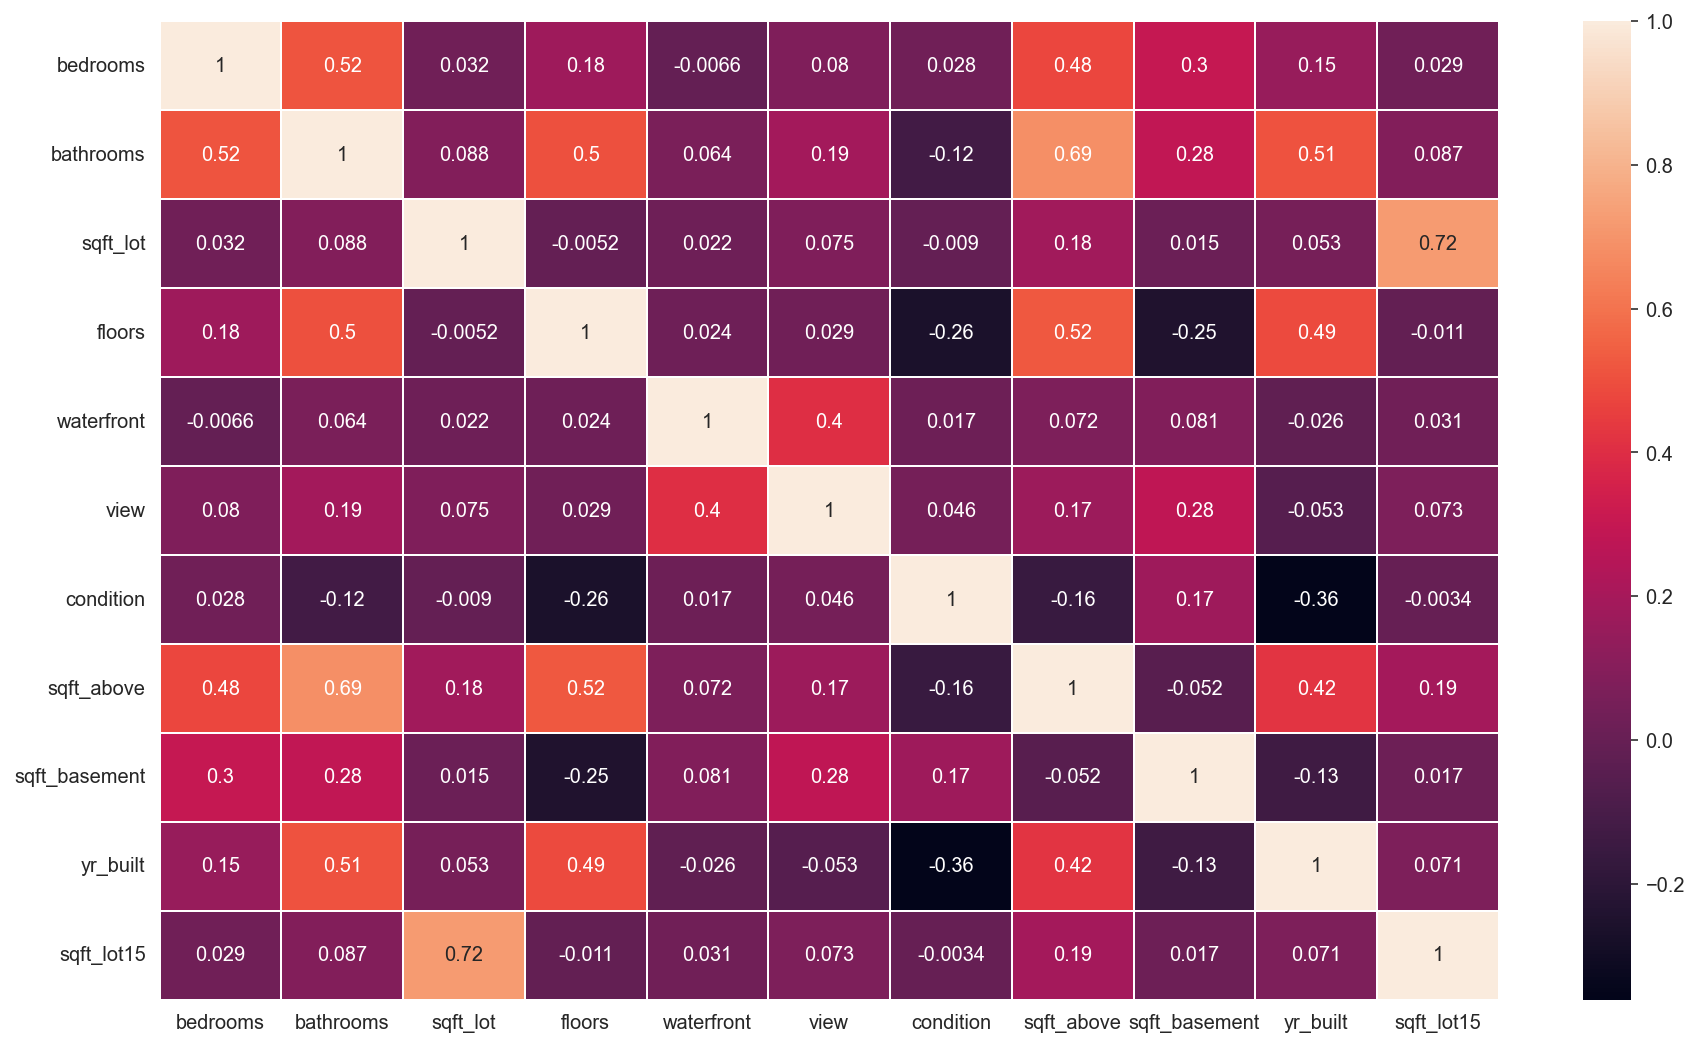

In [21]:
sns.heatmap(df_vif.corr(),annot=True,lw=1)

Next: sqft_lot15

In [22]:
# VIF dataframe
vif_data = pd.DataFrame()
df_vif = df_m.drop(['price','sqft_living', 'grade', 'sqft_living15', 'sqft_lot15'], axis=1)
vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]
  
print(vif_data)

         feature        VIF
0       bedrooms  22.428215
1      bathrooms  24.540381
2       sqft_lot   1.199704
3         floors  15.833458
4     waterfront   1.205370
5           view   1.466797
6      condition  29.988093
7     sqft_above  14.700809
8  sqft_basement   2.480171
9       yr_built  55.123000


<AxesSubplot:>

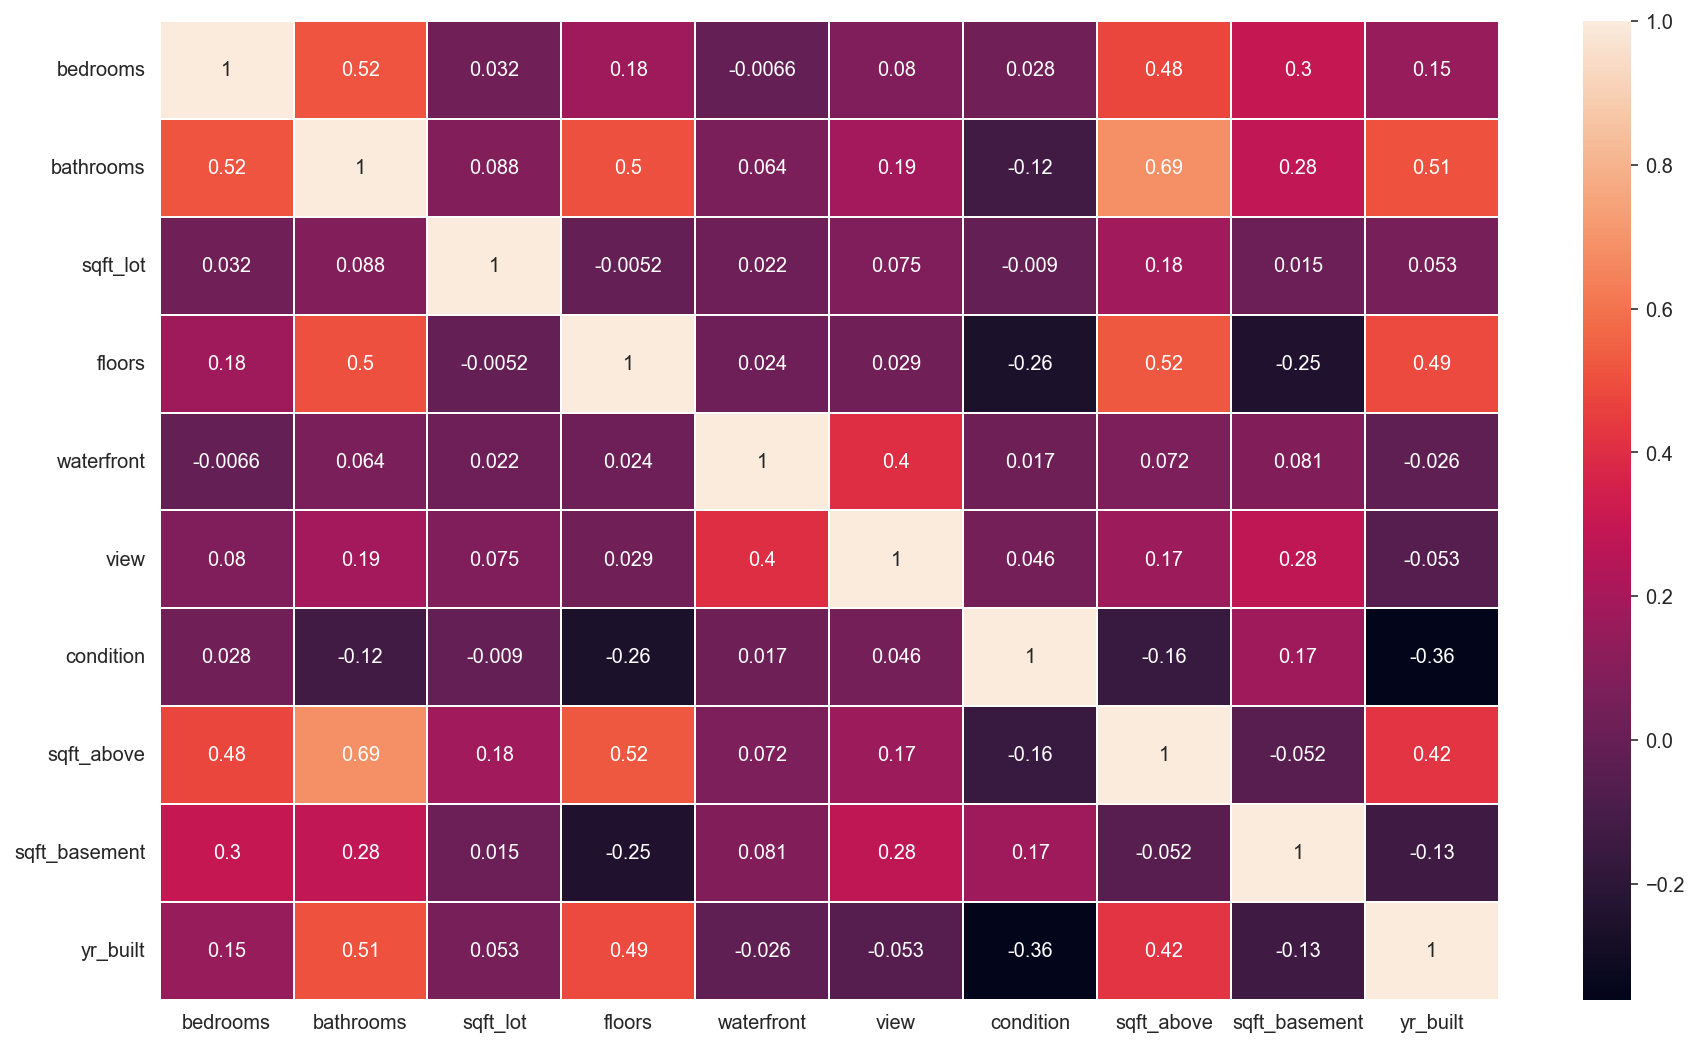

In [23]:
sns.heatmap(df_vif.corr(),annot=True,lw=1)

In [24]:
dep = 'price'
ind = ['bedrooms',
        'bathrooms',
        'sqft_lot',
        'floors',
        'waterfront',
        'view',
        'condition',
        'sqft_above',
        'sqft_basement',
        'yr_built']
model = sm.OLS(df[dep], df[ind])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          1.370e+04
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                        0.00
Time:                        14:31:29   Log-Likelihood:                     -2.9851e+05
No. Observations:               21613   AIC:                                  5.970e+05
Df Residuals:                   21603   BIC:                                  5.971e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.732e+04   2220.535    -21.309      0.000   -5.17e+04    -4.3e+04
bathrooms      1.246e+04   3608.836      3.453      0.001    5387.773    1.95e+04
sqft_lot         -0.3796      0.041     -9.319      0.000      -0.459      -0.300
floors         2.504e+04   4106.079      6.098      0.000     1.7e+04    3.31e+04
waterfront     5.503e+05   2.07e+04     26.546      0.000     5.1e+05    5.91e+05
view           7.197e+04   2478.044     29.042      0.000    6.71e+04    7.68e+04
condition      5.376e+04   2586.742     20.783      0.000    4.87e+04    5.88e+04
sqft_above      282.7643      3.190     88.647      0.000     276.512     289.016
sqft_basement   271.5927      4.872     55.741      0.000     262.042     281.143
yr_built        -75.2570      6.175    -12.187      0.000     -87.361     -63.153
==============================================================================
Omnibus:                    13254.961   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           462521.533
Skew:                           2.398   Prob(JB):                         0.00
Kurtosis:                      25.150   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regularizaton

The attempt to resolve the multicollinearity in the model through excluding some of the variables did not result in solution. Next we will try to reduce the multicollinearity by using regularization.

#### Standardization

Our dataset's features vary quite a lot in terms of their range. Thus, we need to scale our features. We are using standaridization so that the outliers do not affect our data.

In [25]:
df_m.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


###### (Do we need to use min-max scaling for the variables such as floors, view,...?)

First we split our dataset into train and test datasets.

In [26]:
dep = 'price'
ind = ['bedrooms',
        'bathrooms',
        'sqft_lot',
        'floors',
        'waterfront',
        'view',
        'condition',
        'sqft_above',
        'sqft_basement',
        'yr_built']

X = df_m[ind]
y = df_m.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=25)

##### Standard Scaling

In [27]:
scaledX_train = StandardScaler().fit_transform(X_train)
scaledX_test = StandardScaler().fit_transform(X_test)

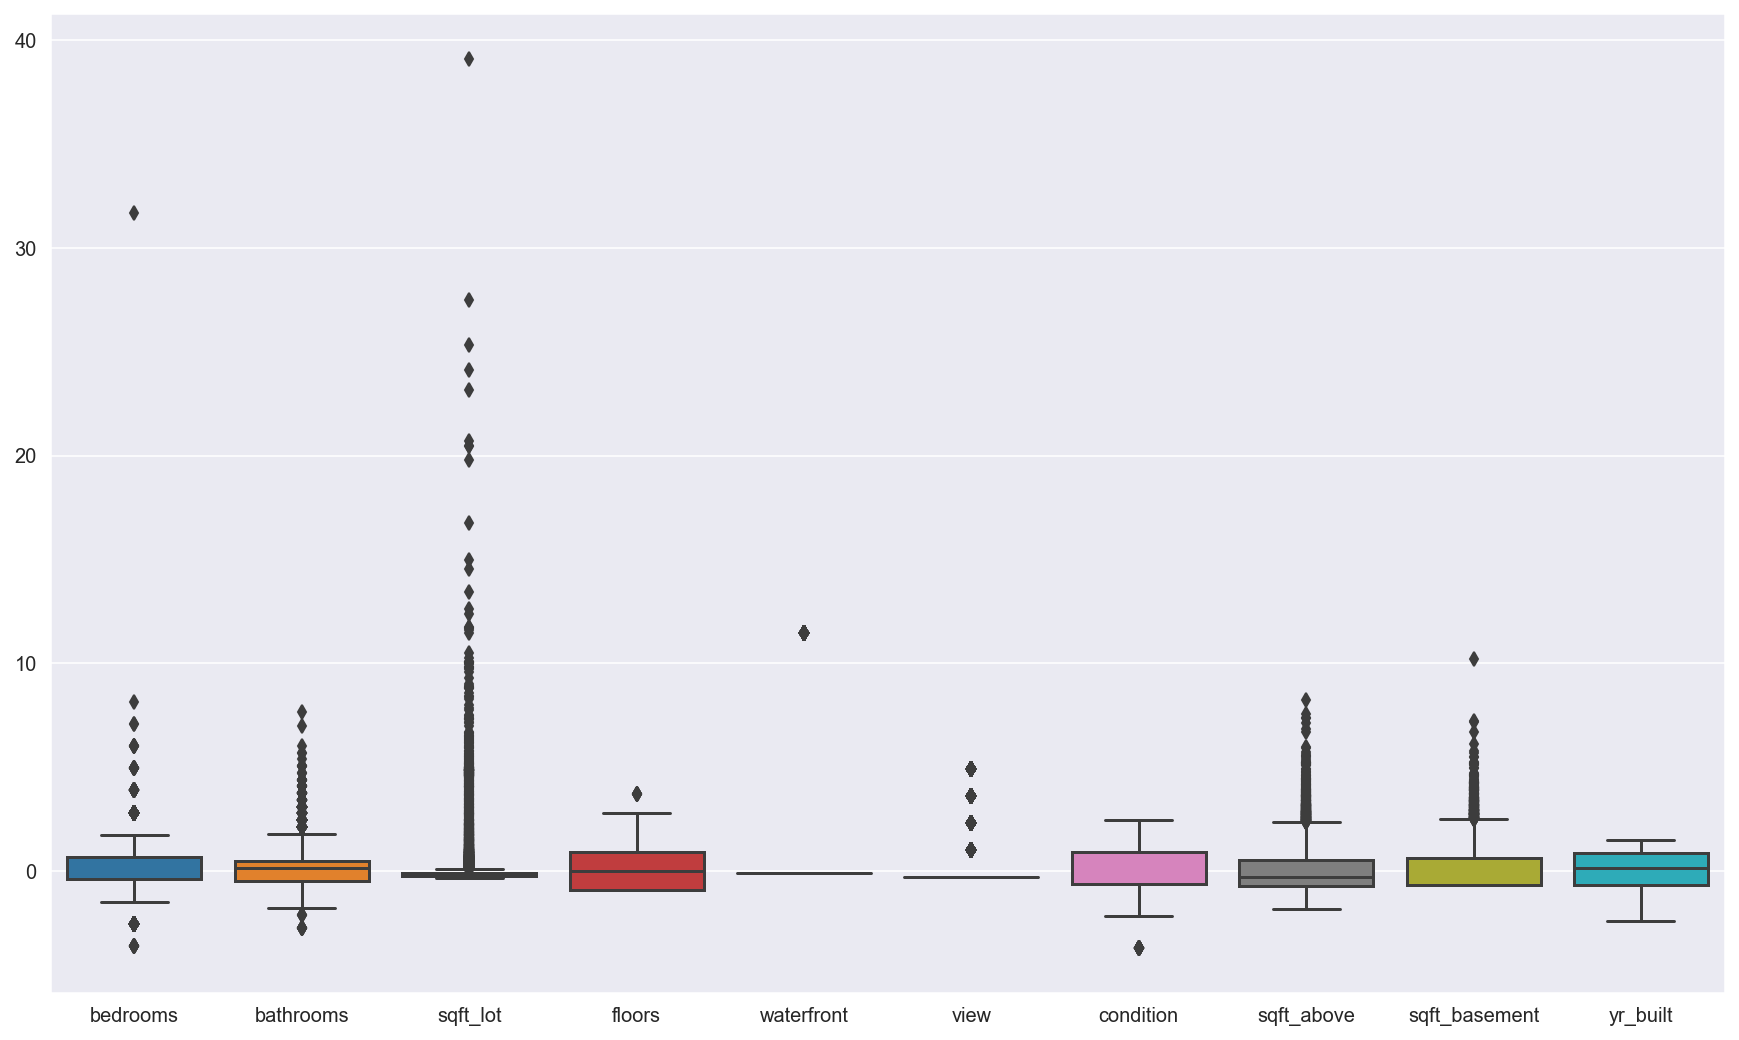

In [28]:
sns.boxplot(data=scaledX_train).set_xticklabels(X.columns);

#### Lasso Regression

In [29]:
lasso = Lasso()
lasso.fit(scaledX_train,y_train)
train_score=lasso.score(scaledX_train,y_train)
test_score=lasso.score(scaledX_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score: ", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
print(pd.DataFrame(np.vstack((ind, lasso.coef_)).transpose(),columns=['feature','coeff']))

training score:  0.603174366197057
test score:  0.5822131327485771
number of features used:  10
         feature                coeff
0       bedrooms   -51936.27224823654
1      bathrooms   49983.196310507235
2       sqft_lot  -14470.287342466265
3         floors   25289.643787732773
4     waterfront    46416.13620563024
5           view    48128.76122643501
6      condition   11501.699658219184
7     sqft_above   231631.49998200109
8  sqft_basement   110626.63480342447
9       yr_built    -86410.7962458696


In [30]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(scaledX_train,y_train)
train_score001=lasso001.score(scaledX_train,y_train)
test_score001=lasso001.score(scaledX_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01: ", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01: ", coeff_used001)
print(pd.DataFrame(np.vstack((ind, lasso001.coef_)).transpose(),columns=['feature','coeff']))

training score for alpha=0.01:  0.6031743663056168
test score for alpha =0.01:  0.5822131389520684
number of features used: for alpha =0.01:  10
         feature               coeff
0       bedrooms  -51939.30352789737
1      bathrooms   49984.29991138579
2       sqft_lot   -14471.5725796811
3         floors  25291.090519491652
4     waterfront   46416.69630404137
5           view    48128.6261491138
6      condition   11502.57543112688
7     sqft_above  231633.75739082886
8  sqft_basement  110628.27539989231
9       yr_built  -86412.93614731944


In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(scaledX_train,y_train)
train_score00001=lasso00001.score(scaledX_train,y_train)
test_score00001=lasso00001.score(scaledX_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001: ", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001: ", coeff_used00001)
print(pd.DataFrame(np.vstack((ind, lasso00001.coef_)).transpose(),columns=['feature','coeff']))

training score for alpha=0.0001:  0.6031743663056277
test score for alpha =0.0001:  0.5822131390239733
number of features used: for alpha =0.0001:  10
         feature               coeff
0       bedrooms  -51939.33375246741
1      bathrooms  49984.310331917346
2       sqft_lot  -14471.58550413766
3         floors  25291.104881031086
4     waterfront   46416.70194482004
5           view   48128.62471864022
6      condition   11502.58426903963
7     sqft_above   231633.7802765735
8  sqft_basement   110628.2920038394
9       yr_built  -86412.95727306821


In [32]:
lr = LinearRegression()
lr.fit(scaledX_train,y_train)
lr_train_score=lr.score(scaledX_train,y_train)
lr_test_score=lr.score(scaledX_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)
print(pd.DataFrame(np.vstack((ind, lr.coef_)).transpose(),columns=['feature','coeff']))

LR training score: 0.6031743663056277
LR test score:  0.5822131390243863
         feature                coeff
0       bedrooms   -51939.33405139401
1      bathrooms    49984.31042965366
2       sqft_lot  -14471.585634664005
3         floors    25291.10502623944
4     waterfront    46416.70200223263
5           view    48128.62470451578
6      condition   11502.584359650868
7     sqft_above    231633.7805066003
8  sqft_basement   110628.29217242378
9       yr_built   -86412.95748259267


In [33]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built'],
      dtype='object')

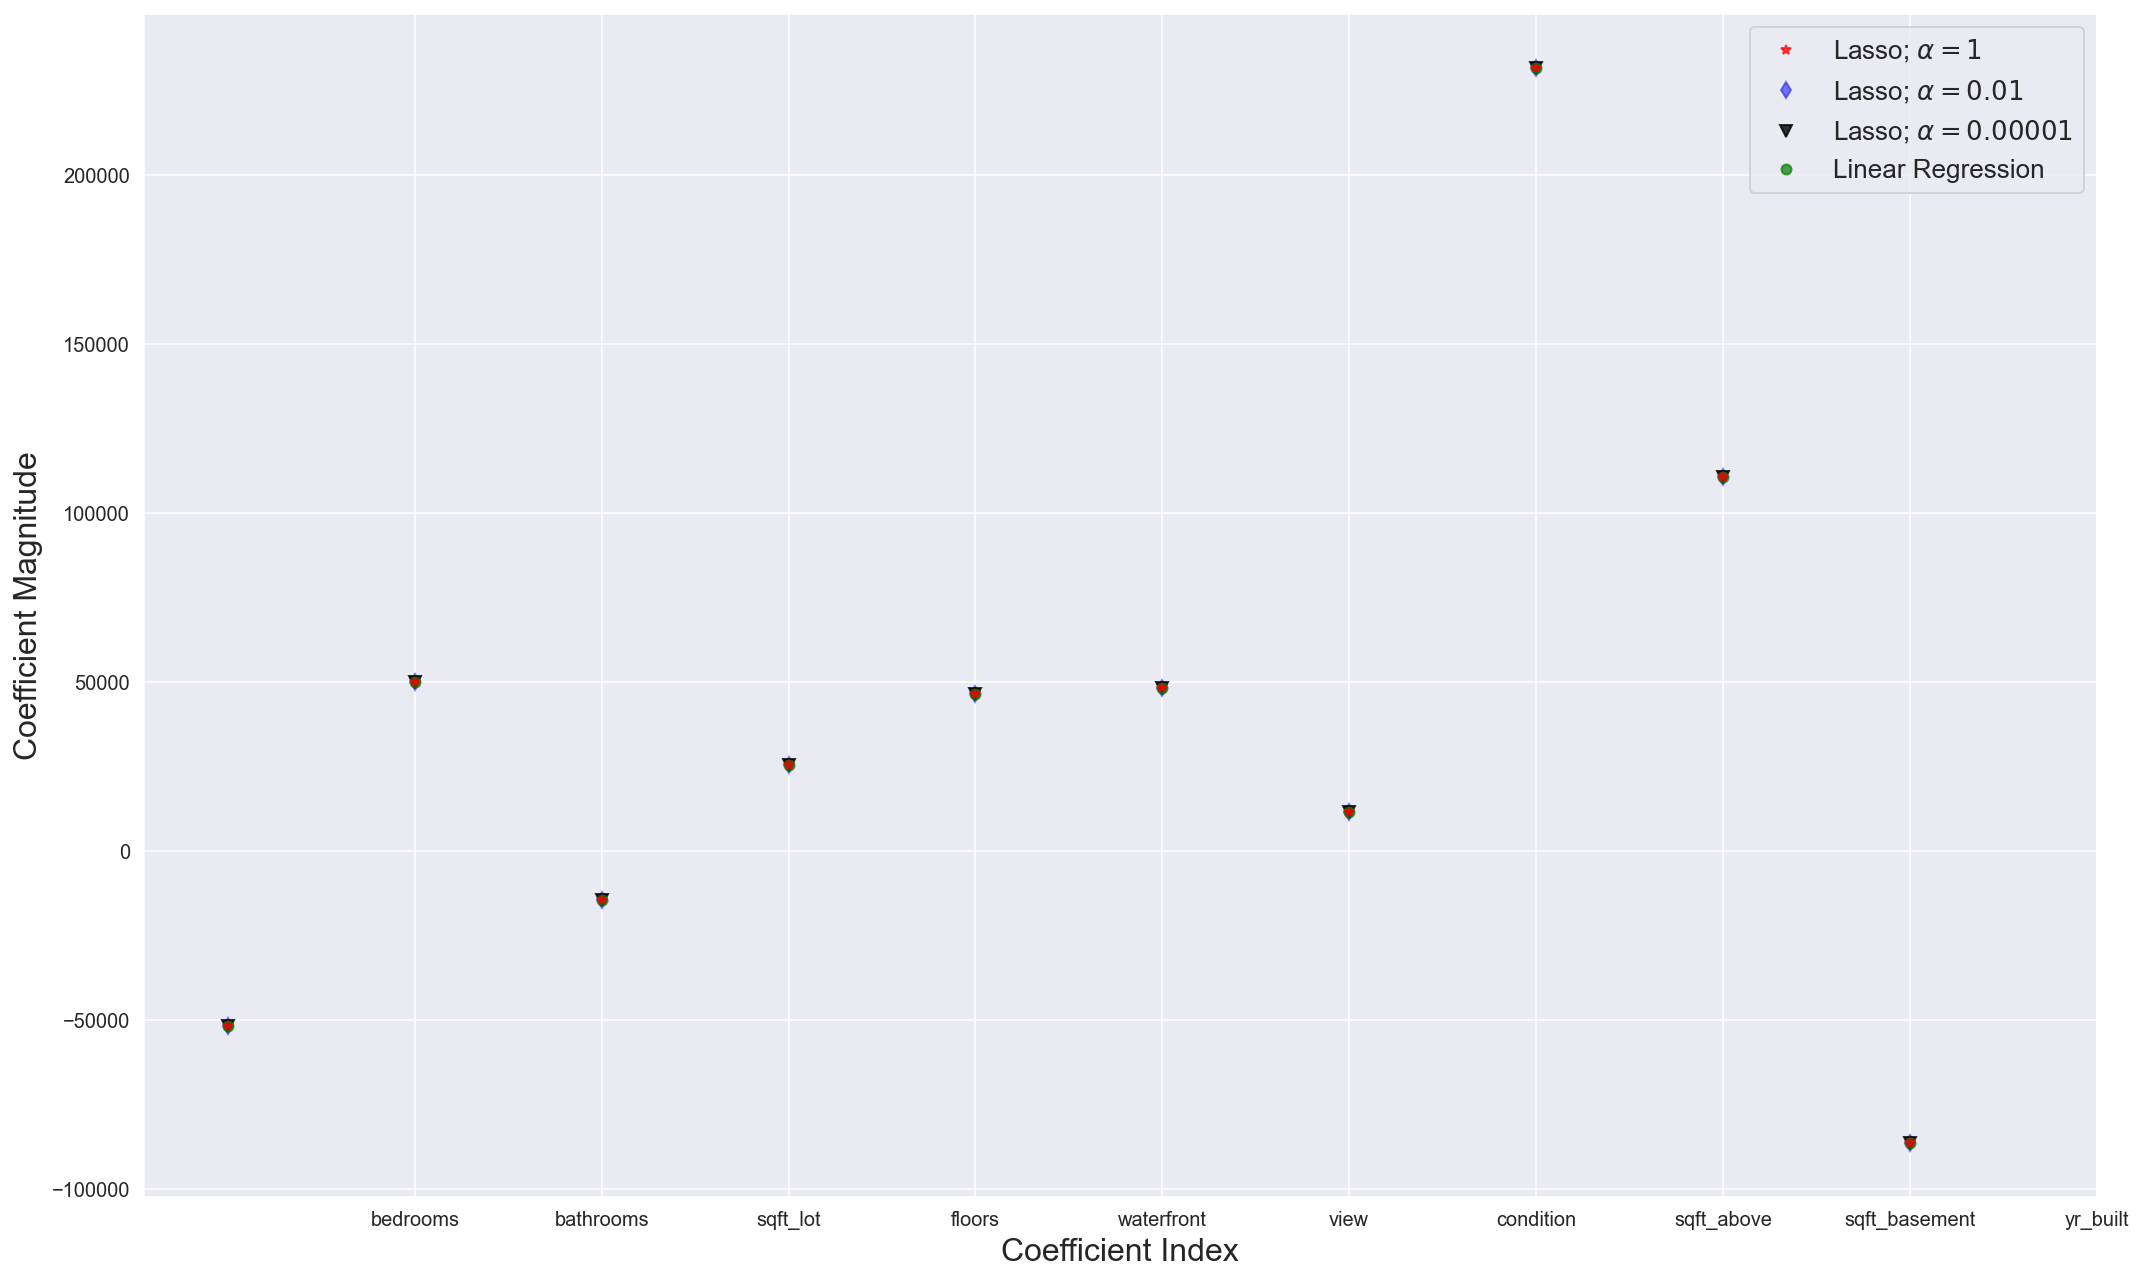

In [34]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10], labels=X.columns);
plt.legend(fontsize=13,loc=1)
plt.tight_layout()
plt.show()

#### Ridge Regression

In [35]:
ridge = Ridge()
ridge.fit(scaledX_train,y_train)
train_score=ridge.score(scaledX_train,y_train)
test_score=ridge.score(scaledX_test,y_test)
coeff_used = np.sum(ridge.coef_!=0)
print("training score: ", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
print(pd.DataFrame(np.vstack((ind, ridge.coef_)).transpose(),columns=['feature','coeff']))

training score:  0.6031743613861598
test score:  0.5822105228478514
number of features used:  10
         feature               coeff
0       bedrooms  -51922.10182909946
1      bathrooms   49996.15484200149
2       sqft_lot  -14466.52118343064
3         floors  25290.698436469374
4     waterfront   46415.73049074724
5           view   48133.57857158689
6      condition  11503.493683482486
7     sqft_above   231597.7184164713
8  sqft_basement  110611.07185029729
9       yr_built  -86403.10529742274


In [36]:
ridge001 = Ridge(alpha=0.01, max_iter=10e5)
ridge001.fit(scaledX_train,y_train)
train_score001=ridge001.score(scaledX_train,y_train)
test_score001=ridge001.score(scaledX_test,y_test)
coeff_used001 = np.sum(ridge001.coef_!=0)
print("training score for alpha=0.01: ", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01: ", coeff_used001)
print(pd.DataFrame(np.vstack((ind, ridge001.coef_)).transpose(),columns=['feature','coeff']))

training score for alpha=0.01:  0.6031743663051357
test score for alpha =0.01:  0.582213112901059
number of features used: for alpha =0.01:  10
         feature                coeff
0       bedrooms  -51939.161697692296
1      bathrooms    49984.42892605295
2       sqft_lot   -14471.53497968528
3         floors    25291.10095613638
4     waterfront    46416.69228679392
5           view    48128.67425840788
6      condition   11502.593454125898
7     sqft_above   231633.41980832326
8  sqft_basement   110628.11992586937
9       yr_built   -86412.85895661963


In [37]:
ridge00001 = Ridge(alpha=0.0001, max_iter=10e5)
ridge00001.fit(scaledX_train,y_train)
train_score00001=ridge00001.score(scaledX_train,y_train)
test_score00001=ridge00001.score(scaledX_test,y_test)
coeff_used00001 = np.sum(ridge00001.coef_!=0)
print("training score for alpha=0.0001: ", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001: ", coeff_used00001)
print(pd.DataFrame(np.vstack((ind, ridge00001.coef_)).transpose(),columns=['feature','coeff']))

training score for alpha=0.0001:  0.6031743663056277
test score for alpha =0.0001:  0.5822131387631568
number of features used: for alpha =0.0001:  10
         feature                coeff
0       bedrooms   -51939.33232785354
1      bathrooms    49984.31161462288
2       sqft_lot  -14471.585128113205
3         floors    25291.10498553786
4     waterfront    46416.70190507854
5           view   48128.625200056376
6      condition   11502.584450595548
7     sqft_above   231633.77689960983
8  sqft_basement    110628.2904499538
9       yr_built    -86412.9564973327


In [38]:
lr = LinearRegression()
lr.fit(scaledX_train,y_train)
lr_train_score=lr.score(scaledX_train,y_train)
lr_test_score=lr.score(scaledX_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)
print(pd.DataFrame(np.vstack((ind, lr.coef_)).transpose(),columns=['feature','coeff']))

LR training score: 0.6031743663056277
LR test score:  0.5822131390243863
         feature                coeff
0       bedrooms   -51939.33405139401
1      bathrooms    49984.31042965366
2       sqft_lot  -14471.585634664005
3         floors    25291.10502623944
4     waterfront    46416.70200223263
5           view    48128.62470451578
6      condition   11502.584359650868
7     sqft_above    231633.7805066003
8  sqft_basement   110628.29217242378
9       yr_built   -86412.95748259267


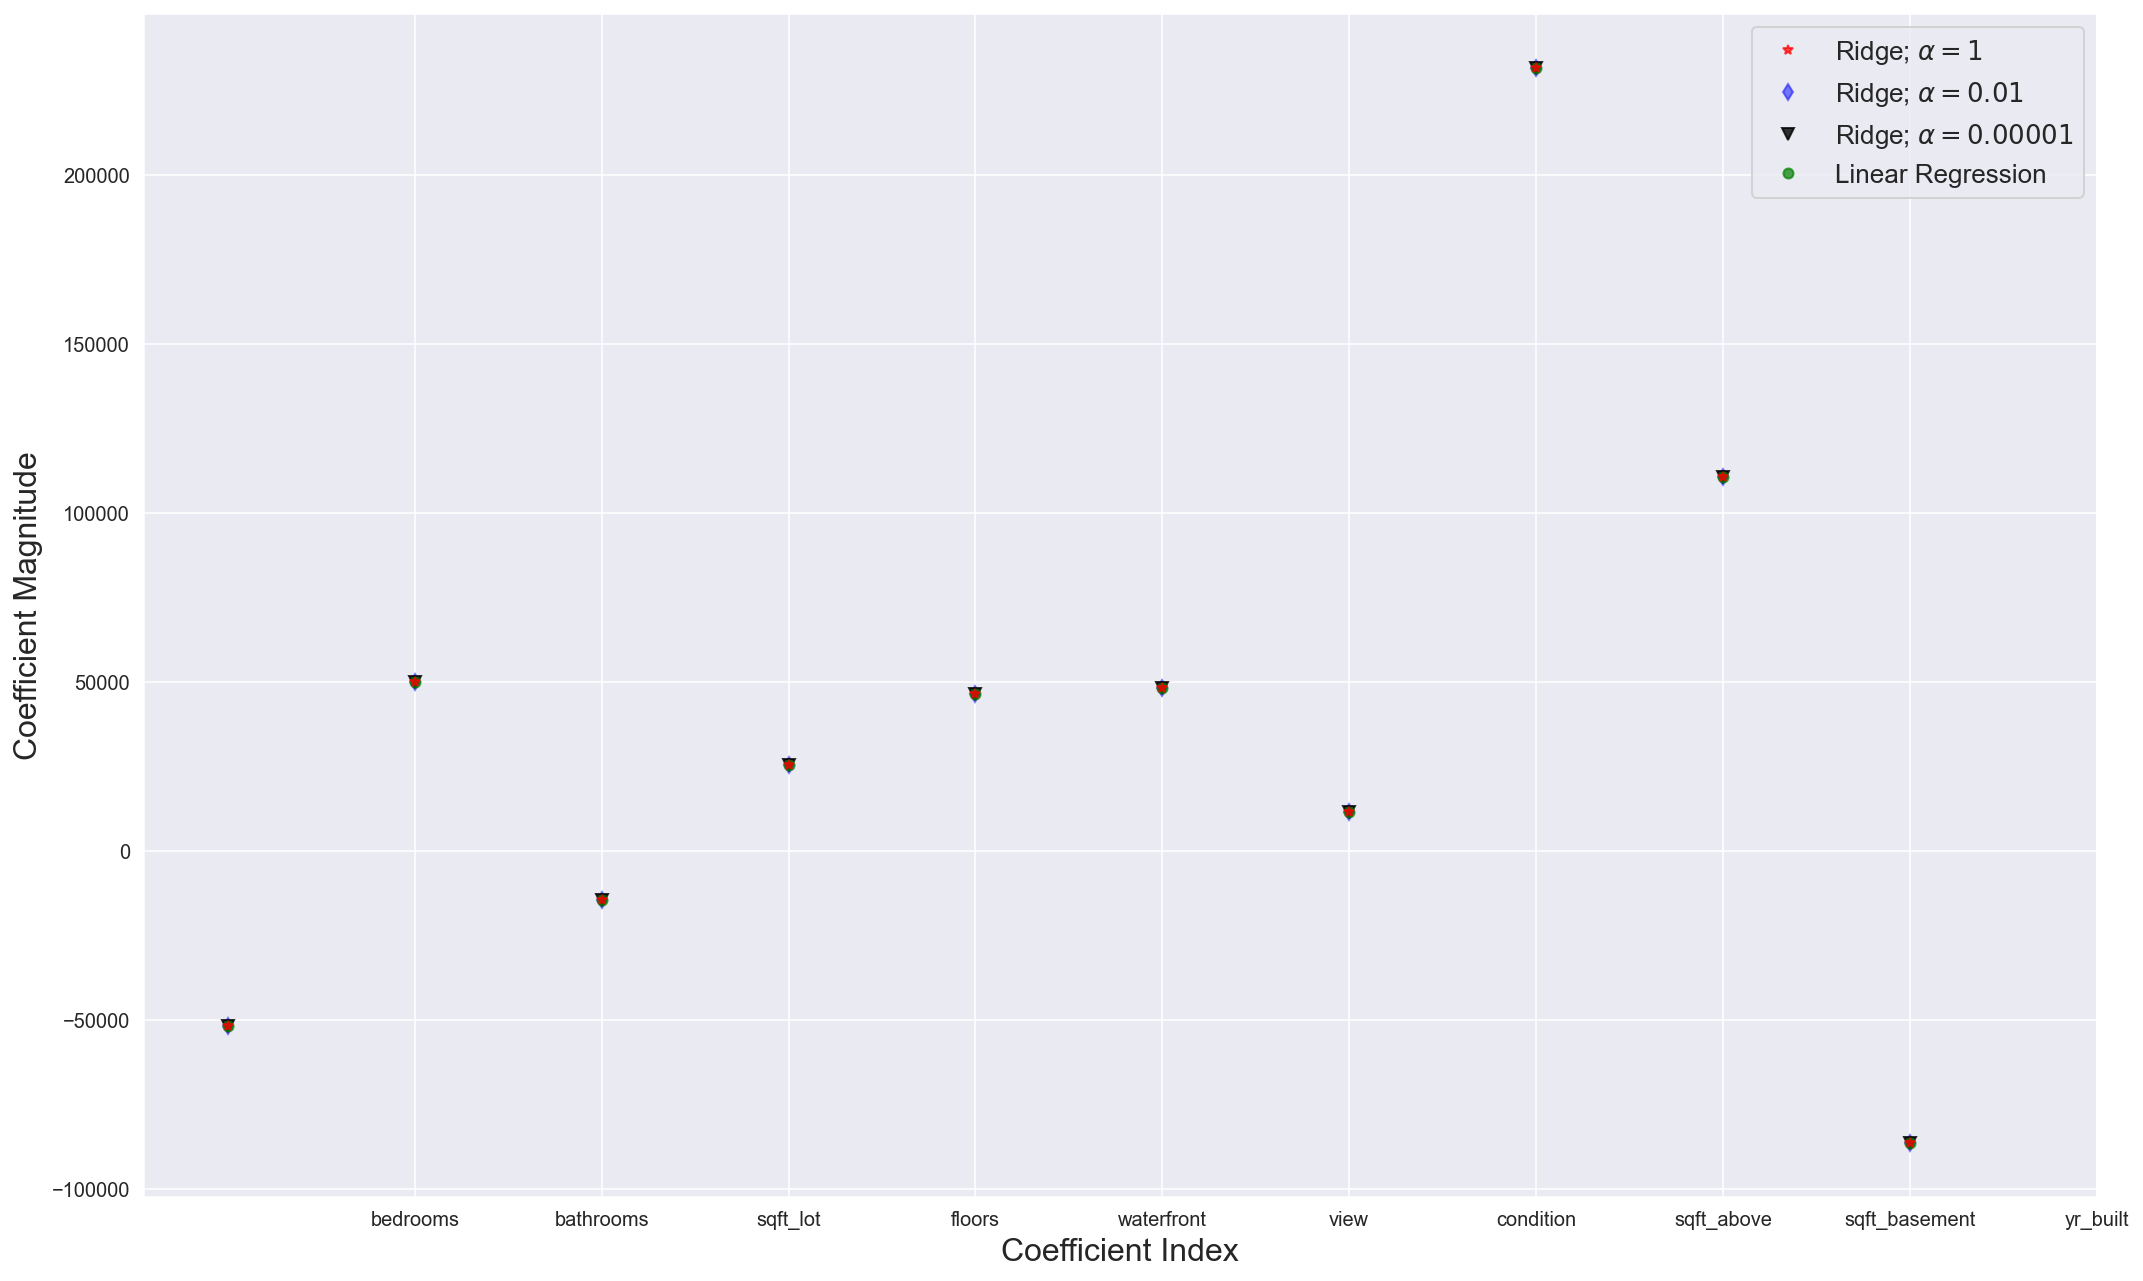

In [39]:
plt.plot(ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(ridge001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(ridge00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Ridge; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10], labels=X.columns);
plt.legend(fontsize=13,loc=1)
plt.tight_layout()
plt.show()

The similarity of the results between Lasso/Risge and linear regression is an indicator that all the factors used in the model are significant.

#### Checking the Linearity

ValueError: Must pass `data` if using named variables.

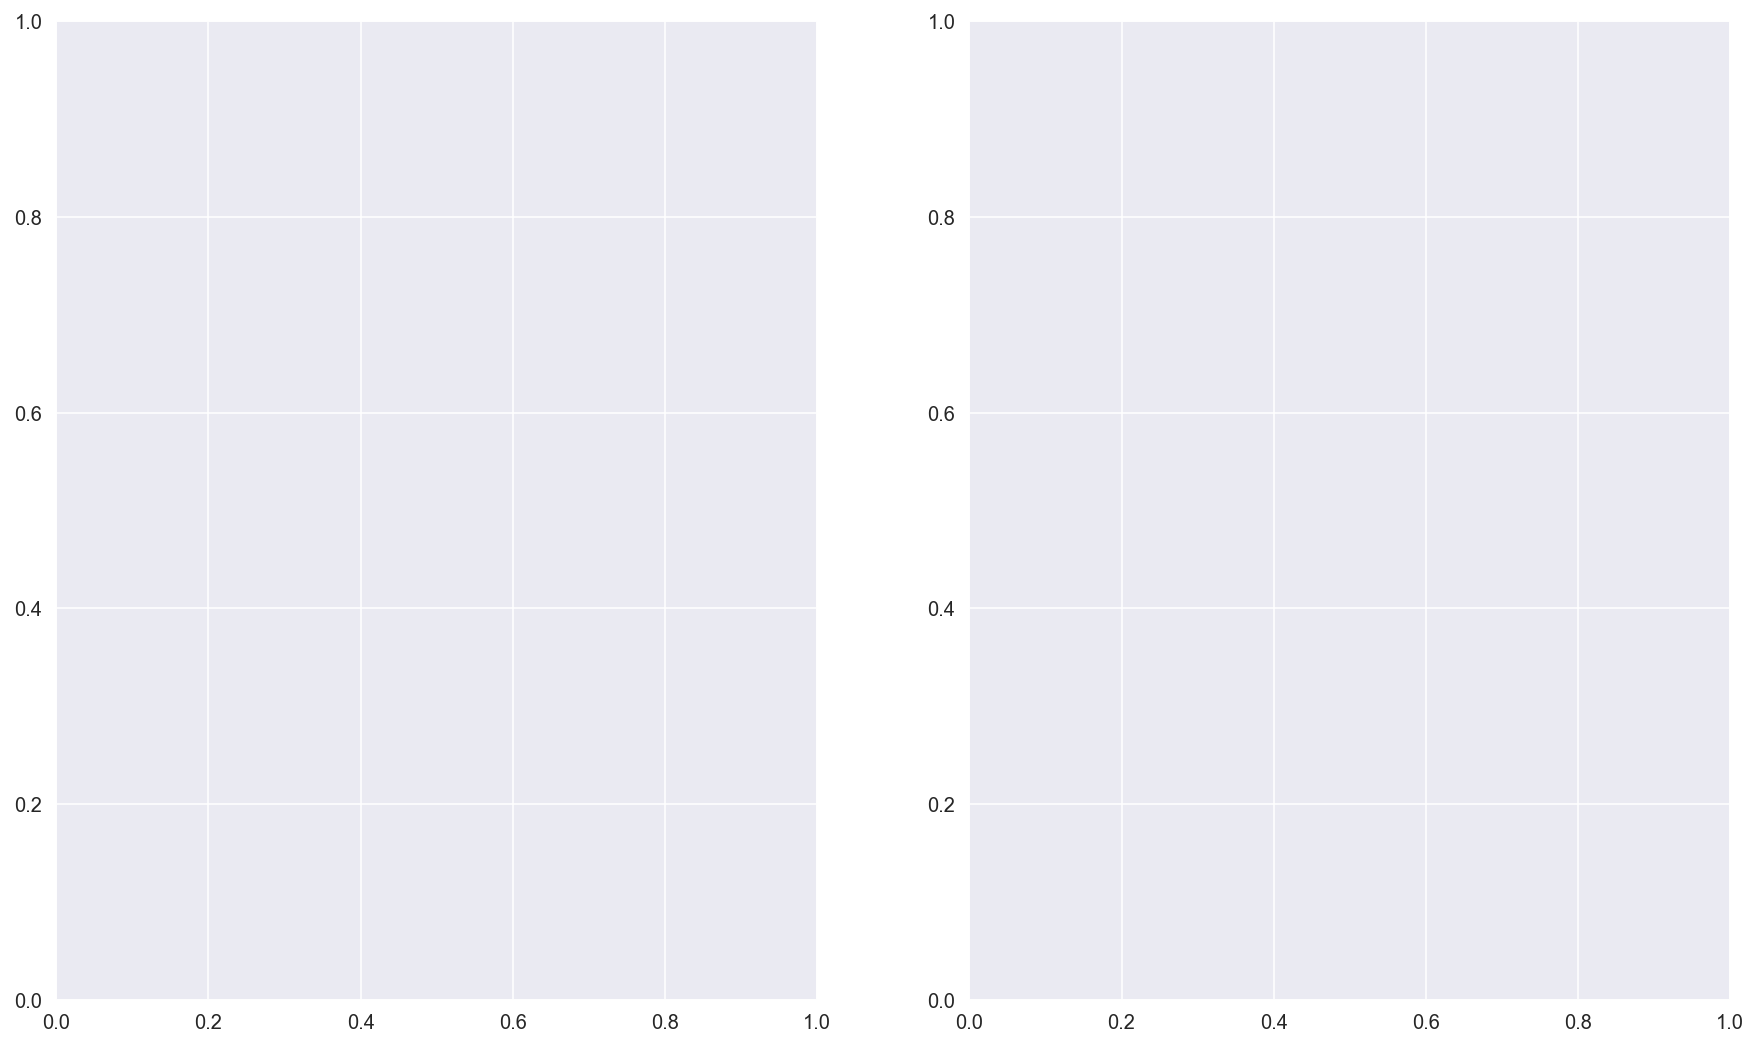

In [41]:
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(results, dep)    

#### Checking the Expectation

In [ ]:
results.resid.mean()

#### Homoscedasticity 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(results)

In [ ]:
olsgraph = sns.regplot(x=ind, y=dep, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
olsgraph.figure.set_size_inches(15,5)

Visual inspection indicates linear correlation between bathrooms and sqft_living.